## Towards Embeddings 

The previous example was cute but usually we won't have embeddings that are mere 2d vectors. I want to understand "what lies" in general word embeddings. 

So, what can we do? We'll briefly talk about 2d embeddings in order to understand something about plotting higher dimensional vectors.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (6, 6)

from whatlies import Token

## Imaginary Embeddings

Let's take three embeddings as an example.

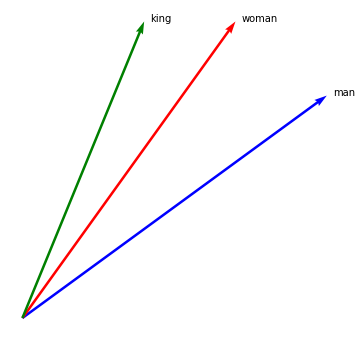

In [3]:
man   = Token("man", [0.5, 0.15])
woman = Token("woman", [0.35, 0.2])
king  = Token("king", [0.2, 0.2])

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="green")

plt.axis('off');

## Mapping Unto Tokens

In the previous notebook we demonstrated how to map "away" from vectors. But we can also map "unto" vectors. For this we introduce the `>>` operator.

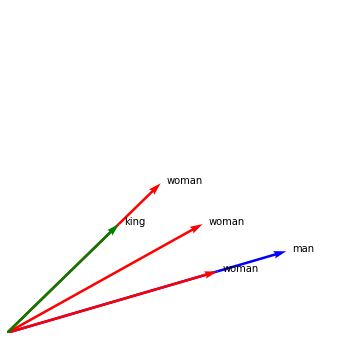

In [4]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
(woman >> man).plot(kind="arrow", color="red")
(woman >> king).plot(kind="arrow", color="red")
king.plot(kind="arrow", color="green")

plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.axis('off');

### Measuring the Mapping

Note that the `woman` vector in our embedding maps partially unto `man` and overshoots a bit on `king`. We can quantify this by measuring what percentage of the vector is covered. This factor can be retreived by using the `>` operator.

In [5]:
woman > king, woman > man

(1.3749999999999998, 0.7522935779816513)

## Interesting 

The interesting thing here is that we can plot one token on the axis of another one. Our embeddings here were of a higher dimension then we can still perform the `>` operation. No matter how large the embedding, we could've said `woman` spans 1.375 of `king` and 0.752 of `man`. Given `king` as the x-axis and `man` as the y-axis, we can map the token of `man` to a 2d representation (1.375, 0.752) which is easy to plot.

This is an interesting way of thinking about it. We can plot high dimensional vectors in 2d as long as we can plot it along two axes. An axis could be a vector of a token, or a token that has had operations on it. 

Note that this `>` mapping can also cause negative values. The example below demonstrates this.

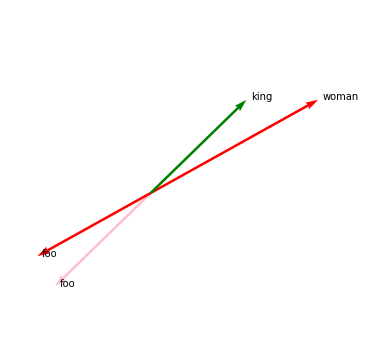

In [6]:
foo = Token("foo", [-0.2, -0.2])

foo.plot(kind="arrow", color="pink")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="green")
(foo >> woman).plot(kind="arrow", color="red")

plt.xlim(-.3, 0.4)
plt.ylim(-.3, 0.4)
plt.axis('off');

In [7]:
foo > woman

-0.6769230769230771

## High Dimensions 

Let's confirm this idea by using some spaCy word-vectors.

In [8]:
import spacy 
nlp = spacy.load('en_core_web_md')

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [9]:
words = ["cat", "dog", "fish", "kitten", "man", "woman", "king", "queen", "doctor", "nurse"]
tokens = {t.text: Token(t.text, t.vector) for t in nlp.pipe(words)}

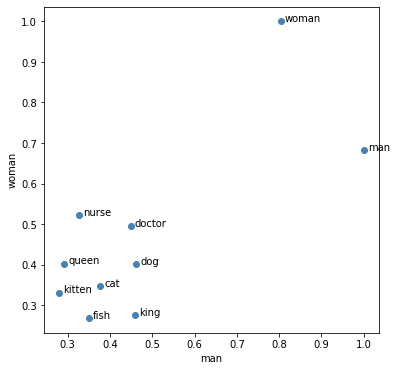

In [10]:
x_axis = tokens['man']
y_axis = tokens['woman']
for name, t in tokens.items():
    t.plot(x_axis=x_axis, y_axis=y_axis).plot(kind="text", x_axis=x_axis, y_axis=y_axis)

The interesting thing is that we can also perform operations on these words before plotting them.

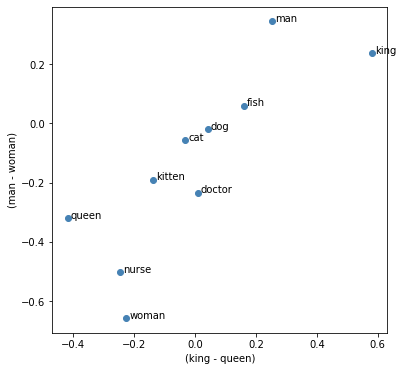

In [11]:
royalty = tokens['king'] - tokens['queen']
gender = tokens['man'] - tokens['woman']
for n, t in tokens.items():
    (t
      .plot(x_axis=royalty, y_axis=gender)
      .plot(kind="text", x_axis=royalty, y_axis=gender))

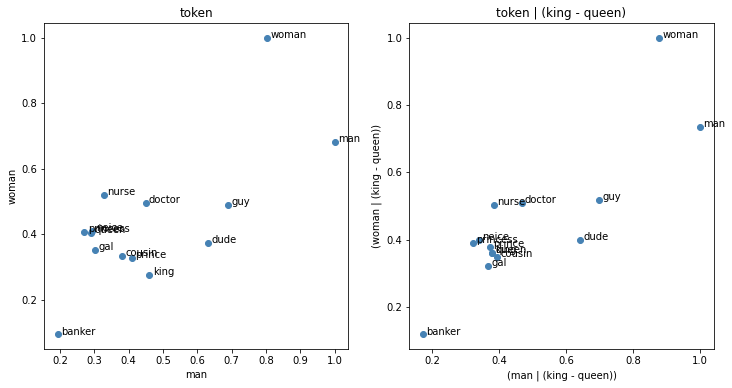

In [12]:
words = ["prince", "princess", "nurse", "doctor", "banker", "man", "woman", 
         "cousin", "neice", "king", "queen", "dude", "guy", "gal"]
tokens = {t.text: Token(t.text, t.vector) for t in nlp.pipe(words)}
x_axis = tokens['man']
y_axis = tokens['woman']

plt.figure(figsize=(12, 6))
plt.subplot(121)
for name, t in tokens.items():
    t.plot(x_axis=x_axis, y_axis=y_axis).plot(kind="text", x_axis=x_axis, y_axis=y_axis)
    plt.title('token')

plt.subplot(122)
space_to_filter = tokens['king'] - tokens['queen']
for name, t in tokens.items():
    ((t | space_to_filter)
     .plot(x_axis=x_axis | space_to_filter, y_axis=y_axis | space_to_filter)
     .plot(kind="text", x_axis=x_axis | space_to_filter, y_axis=y_axis | space_to_filter))
    plt.title('token | (king - queen)')

## Sets of Tokens 

These plots are cool. But maybe ... it is easier to perform operations on a set of tokens as opposed to singletons. That's why `whatlies` has this notion of a `TokenSet`. We will repeat the steps we took before but now on a tokenset.

In [13]:
from whatlies import TokenSet
t = TokenSet(tokens)

You can fetch a token from a tokenset and do operations on them.

In [14]:
t['man'] | (t['man'] - t['woman'])

Token[(man | (man - woman))]

But the idea of a `TokenSet` is that you can also do these operations in bulk.

In [15]:
t | (t['man'] - t['woman'])

(TokenSet | (man - woman))

This makes plotting just a bit lot easier.

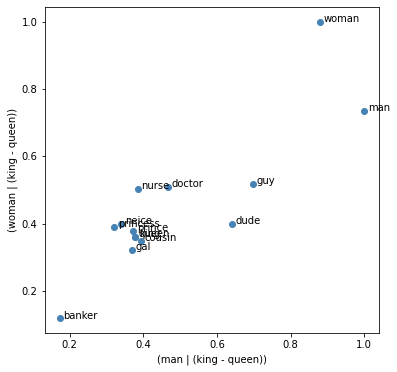

In [16]:
new_ts = t | (t['man'] - t['woman'])
x_axis = t['man'] | (t['king'] - t['queen'])
y_axis = t['woman'] | (t['king'] - t['queen'])
(new_ts
  .plot(kind='scatter', x_axis=x_axis, y_axis=y_axis)
  .plot(kind='text', x_axis=x_axis, y_axis=y_axis));